In [2]:
#################################
#Run this cell if using Google COLAB
#################################

#clone the repository and the data to run the notebook on Google Colab
!git clone https://github.com/GfellerLab/TCRpred
!pip install wget >> /dev/null 
!pip install pytorch_lightning==1.6.0 >> /dev/null 
%cd TCRpred

# TCRpred

TCRpred is a sequence-based TCR-pMHC interaction predictor. TCR binding predictions are currently possible for 146 pMHCs. For 43 pMHC robust predictions were achieved in internal cross validation, while models with less than 50 training TCRs have low confidence.

A list of all TCRpred models and additional information is available at ./pretrained_models/info_models.csv  

In [1]:
import pandas as pd
import wget
import os
df_info = pd.read_csv("./pretrained_models/info_models.csv")
df_info

,TCRpred_model_name,Peptide,Origin,MHC_class,MHC,Host_species,Number_training_abTCR,AUC_5fold
0,H2-IAb_DIYKGVYQFKSV,DIYKGVYQFKSV,Lymphocytic choriomeningitis mammarenavirus (L...,MHCII,H2-IAb,MusMusculus,3650,0.953809
1,A0201_GILGFVFTL,GILGFVFTL,Influenza A virus,MHCI,HLA-A*02:01,HomoSapiens,2079,0.943283
2,H2-Kb_SSYRRPVGI,SSYRRPVGI,Influenza A virus,MHCI,H2-Kb,MusMusculus,1158,0.938677
3,H2-Db_SSLENFRAYV,SSLENFRAYV,Influenza A virus,MHCI,H2-Db,MusMusculus,798,0.906340
4,A0201_LLWNGPMAV,LLWNGPMAV,Yellow fever virus (YFV),MHCI,HLA-A*02:01,HomoSapiens,644,0.928752
...,...,...,...,...,...,...,...,...
141,DQ2_PQPELPYPQPE,PQPELPYPQPE,Triticum aestivum,MHCII,HLA-DQ2,HomoSapiens,10,0.992424
142,H2-Kb_KGYVYQGL,KGYVYQGL,Vesicular stomatitis virus (VSV),MHCII,H2-Kb,MusMusculus,10,1.000000
143,B4402_QELIRQGTDY,QELIRQGTDY,Severe acute respiratory syndrome coronavirus ...,MHCI,HLA-B*44:02,HomoSapiens,10,0.933333
144,A0201_RLITGRLQSL,RLITGRLQSL,Severe acute respiratory syndrome coronavirus ...,MHCI,HLA-A*02:01,HomoSapiens,10,0.720833


For pMHCs in the previous list, we can predict which TCRs are more likely to target it.
The input of TCRpred are paired TCRs (V,J gene and CDR3 sequence) like those in the file ./test/test.out. 

In [2]:
input_tcrs = pd.read_csv("./test/test.csv")
input_tcrs

,cdr3_TRA,cdr3_TRB,TRAV,TRAJ,TRBV,TRBJ
0,CARGSNYNVLYF,CASRGQSQNTLYF,TRAV14D,TRAJ21,TRBV13-3,TRBJ2-4
1,CAMSAIMNRDDKIIF,CASRPNPGQGSYEQYF,TRAV17,TRAJ9,TRBV30,TRBJ2-7
2,CAVQRGGQKLLF,CASSPPQRLQETQYF,TRAV19,TRAJ10,TRBV19,TRBJ1-2
3,CAASIVWGSNFGNEKLTF,CASRTGDGQPQHF,TRAV14/DV4,TRAJ26,TRBV10-3,TRBJ2-1
4,CAAGSYNFNKFYF,CASSLSGGRTEAFF,TRAV12-3,TRAJ10,TRBV9,TRBJ2-7
...,...,...,...,...,...,...
998,CAGRDYGGATNKLIF,CSVRLVSKNIQYF,TRAV17,TRAJ9,TRBV12-3,TRBJ2-2
999,CAVRDKGTGGFKTIF,CASSLTGTGAQEQYF,TRAV14/DV4,TRAJ17,TRBV6-6,TRBJ2-3
1000,CAGTDRGSTLGRLYF,CASSQVKVSSYNEQFF,TRAV14/DV4,TRAJ3,TRBV7-9,TRBJ2-7
1001,CAATYGTNAGKSTF,CASSQNGVGGEQYF,TRAV8-2,TRAJ39,TRBV5-5,TRBJ2-1


TCRpred requires 3 inputs:  
1. --model (the TCRpred model for the target pMHC). 
2. --input (the list of TCRs)  
3. --out (output file) the file where the results will be stored.  

For example, we have a list of TCRs (./test/test.csv) and we want to determine which ones are likely to target the HLA-A\*02:01 GILGFVFTL epitope (TCRpred model = A0201_GILGFVFTL). We will save the results in ./test/out_A0201_GILGFVFTL.csv.
The code to run is:

In [3]:
!python TCRpred.py --model A0201_GILGFVFTL --input ./test/test.csv --out ./test/out_A0201_GILGFVFTL.csv
#Please note the leading "!" which allows you to run bash code in the notebook

/home/giancarlo/work_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-06-29 14:34:27.340384: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-29 14:34:27.514276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 14:34:28.120196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not f

Done! The results are sorted from the most probable binder to the least, and we can now proceed with their analysis. We provide both the raw TCRpred score and the %rank. In the paper, we observed that most true binders have a % rank < 0.1

In [4]:
results_GIL = pd.read_csv("./test/out_A0201_GILGFVFTL.csv", comment = '#')
results_GIL

,cdr3_TRA,cdr3_TRB,TRAV,TRAJ,TRBV,TRBJ,score,perc_rank
0,CAGGGSQGNLIF,CASSIRSSYEQYF,TRAV27,TRAJ42,TRBV19,TRBJ2-6,3.85309,0.00040
1,CAGQYGGSQGNLIF,CASSIRSTDTQYF,TRAV12,TRAJ42,TRBV19,TRBJ2-3,3.57812,0.00164
2,CAFINGSSNTGKLIF,CATSSFLAVSYEQYF,TRAV1-2,TRAJ29,TRBV3-1,TRBJ2-2,0.50054,26.01601
3,CAASIDGRNNDMRF,CASSPFTGPPYEQYF,TRAV14/DV4,TRAJ45,TRBV19,TRBJ2-7,0.36692,31.19044
4,CAYRSPWGMGGSQGNLIF,CATSFMVQETQYF,TRAV13-1,TRAJ6,TRBV19,TRBJ1-4,0.04156,45.24820
...,...,...,...,...,...,...,...,...
998,CAEISFFSGGYNKLIF,CSALAGGLNTQYF,TRAV21,TRAJ49,TRBV9,TRBJ2-1,-5.66217,100.00000
999,CAVTDGAGSYQLTF,CASSPSGITGELFF,TRAV2,TRAJ42,TRBV5-8,TRBJ1-1,-5.68870,100.00000
1000,CAVRWDTGNQFYF,CASSQTGRYQETQYF,TRAV8-4,TRAJ26,TRBV9,TRBJ1-5,-5.77388,100.00000
1001,CAVSPTGRRALTF,CATSPGQNTGELFF,TRAV2,TRAJ52,TRBV10-3,TRBJ1-1,-6.11638,100.00000


Not all the 146 pretrained models are stored on GitHub. To make predictions for another pMHC we first need to download the corresponding TCRpred model.  
For example, if we want to study the HLA-A\*02:01,YLQPRTFLL epitope from the SARS-CoV-2 with TCRpred model_name A0201_YLQPRTFLL, we can download it by running:

In [4]:
model_name="A0201_YLQPRTFLL"
if os.path.exists("./pretrained_models/model_{0}.ckpt".format(model_name)):
    print("TCRpred model already downloaded")
else:
    url = "https://zenodo.org/record/7930623/files/model_"+model_name+".ckpt"
    print("Downloading TCRpred model for {0}".format(model_name))
    filename = wget.download(url, out = './pretrained_models')

TCRpred model already downloaded


 Now we can make predictions for the new pMHC.

In [5]:
!python TCRpred.py --model A0201_YLQPRTFLL --input ./test/test.csv --out ./test/out_A0201_YLQPRTFLL.csv

/home/giancarlo/work_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-06-06 13:59:05.690042: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-06 13:59:05.719563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 13:59:06.156751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not f

In [8]:
results_LLW = pd.read_csv("./test/out_A0201_YLQPRTFLL.csv", comment = '#')
results_LLW

,cdr3_TRA,cdr3_TRB,TRAV,TRAJ,TRBV,TRBJ,score,perc_rank
0,CAANRDDKIIF,CSVEFKSRAGELFF,TRAV12-1,TRAJ53,TRBV11-3,TRBJ2-7,2.84108,0.39592
1,CAENLGENQFYF,CATIDTNTGELFF,TRAV13-2,TRAJ47,TRBV4-1,TRBJ1-5,2.46276,0.88953
2,CVVSLRDNYGQNFVF,CASSDTDTGELFF,TRAV19,TRAJ42,TRBV7-8,TRBJ2-3,1.71331,4.08557
3,CAARGFQKLVF,CSVDRTNEKLFF,TRAV21,TRAJ29,TRBV27,TRBJ2-5,1.14473,11.29627
4,CAVYEDDKIIF,CASSLGTDGNEQFF,TRAV1-2,TRAJ23,TRBV6-5,TRBJ2-2,0.78418,19.61315
...,...,...,...,...,...,...,...,...
998,CIVRVGGSSNTGKLIF,CASSQGWGAEGNTIYF,TRAV19,TRAJ45,TRBV19,TRBJ2-7,-3.60105,99.99661
999,CAASTPSGGGADGLTF,CASSQGDQHTDTQYF,TRAV6,TRAJ26,TRBV24-1,TRBJ2-1,-3.69587,99.99787
1000,CAVRIYNAGNNRKLIW,CASSPIDGYGYTF,TRAV17,TRAJ16,TRBV28,TRBJ1-1,-3.75208,99.99839
1001,CAVGGYGGSQGNLIF,CASSLWRGLSAGNTIYF,TRAV26-2,TRAJ47,TRBV27,TRBJ2-3,-3.77857,99.99859


If you want to test your own set of TCRs you can upload it to Google Colab. You can use the "Upload to session storage" button in the top left corner which will upload your file in the '/content/' folder. Specify the path to your TCRs file after e.g. --input /content/your_file.csv. Please refer to the ./test/test.csv file for the correct input format.
    Please note that Google Colab sessions have a time limit of 12 hours, after which they will automatically shut down. Download your results to avoid losing your work.

![](./upload_TCR_file.png)
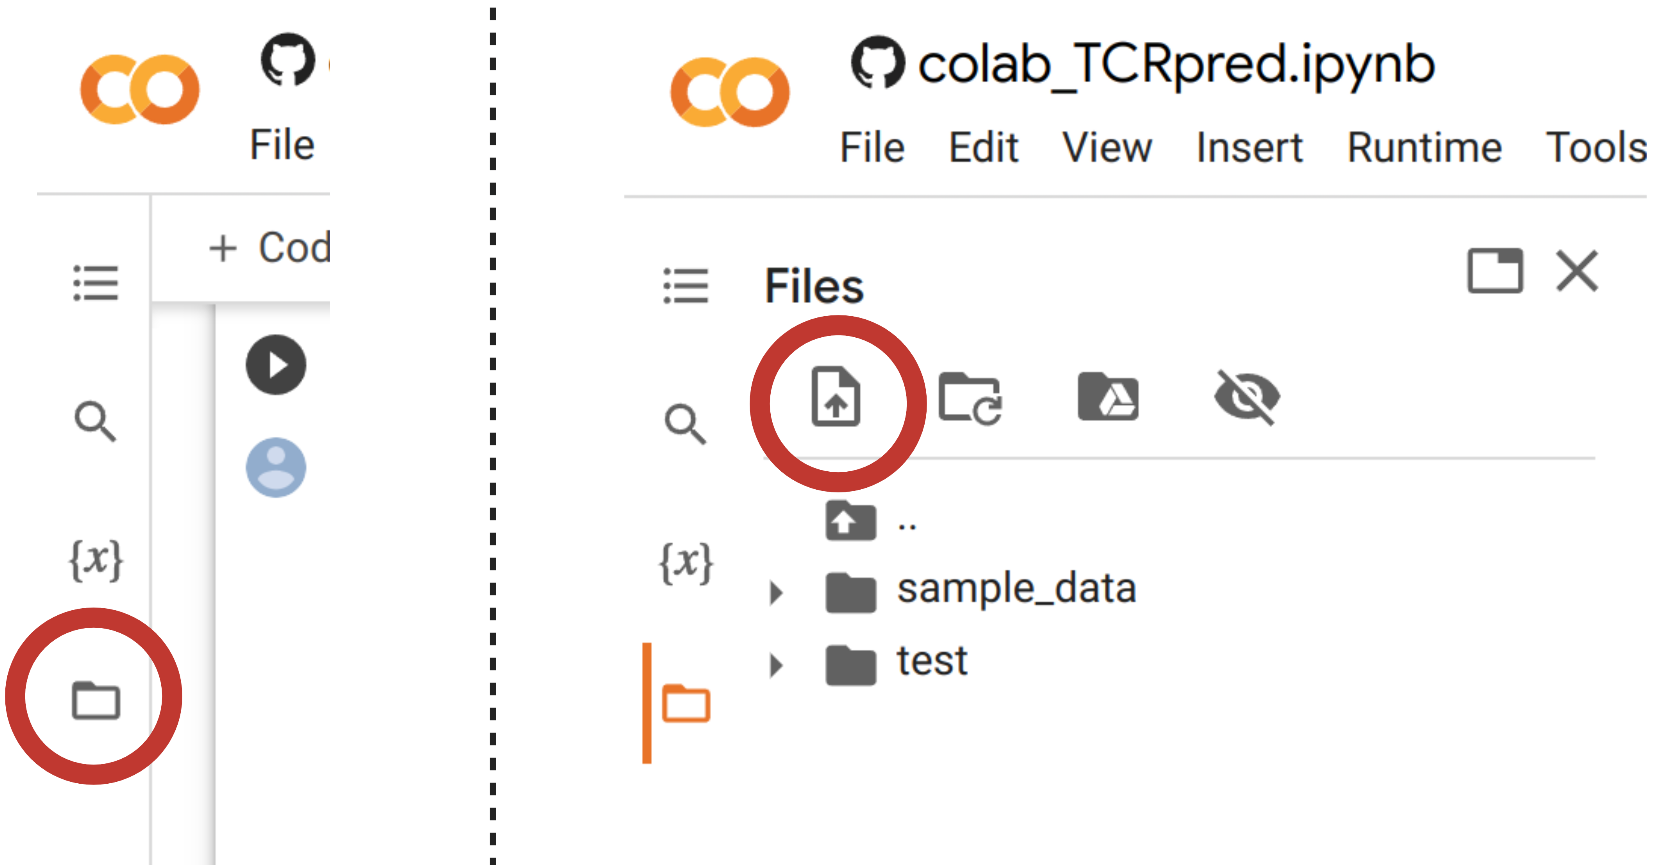